In [1]:
#Caculate how many smart contract opcode in the folder and SSLOAD and SSTore
import os
from collections import Counter
import matplotlib.pyplot as plt 
import csv
from datetime import datetime

In [83]:
#Caculate number of smart contract opcode
count_sc = 0    
Name2Stat = {}
Number_Dao = {}
for filename in os.listdir('/Users/Gabriel/Desktop/opcode'):
    with open('/Users/Gabriel/Desktop/opcode/' + filename) as f:
        content = f.readlines()
        content = [x.strip() for x in content]
        counter = Counter(content)
        Name2Stat[filename] = [counter['SSTORE'], counter['SLOAD'], counter['BALANCE']]
        # 0 是 
        Number_Dao[filename] = [counter['SUICIDE'],counter['EXTCODESIZE']]
        count_sc += 1

In [84]:
# SUICIDE EXTCODESIZE
stat_SUI = sum([1 for x in Number_Dao.values() if x[0]!=0])
stat_EXT = sum([1 for x in Number_Dao.values() if x[1]!=0])
# list of number of this operations
Dao_Op =[stat_SUI,stat_EXT]

In [85]:
Dao_Op

[1467, 7293]

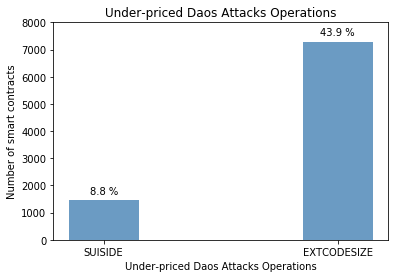

In [86]:
# Plot all Under-priced Daos Attacks 
plt.title('Under-priced Daos Attacks Operations')
plt.xlabel('Under-priced Daos Attacks Operations')
plt.ylabel('Number of smart contracts')
plt.xticks(range(2),['SUISIDE','EXTCODESIZE'])
plt.ylim([0,8000])
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000,8000])
for x,y in enumerate(Dao_Op):
    plt.text(x,y-200,'%0.1f %%\n' %(y/count_sc*100),ha='center')
plt.bar(range(2),Dao_Op , align = 'center',color='steelblue', width = 0.3, alpha = 0.8) 
plt.show()

In [87]:
#Import date of all smart contracts
with open('/Users/Gabriel/Desktop/contract_info_1.csv', mode='r') as infile:
    reader = csv.reader(infile)
    date_Dao = {rows[0]:rows[4] for rows in reader}

In [88]:
#Combine Num2Stat(Opcode) and date_dict(with date) in a new Dictionary withDate_dict.
withDate_Dao = {}
for adr in date_Dao:
    if adr == 'Address':continue
    if adr not in Number_Dao:continue
    withDate_Dao[adr] = Number_Dao[adr]+ [date_Dao[adr]] 

In [89]:
# withDate_Dao used to caculate DaoS Attack 
for date in withDate_Dao:
    min_date = datetime.strptime('4/05/2016', '%m/%d/%Y')
    date_new = datetime.strptime(withDate_Dao[date][-1], '%m/%d/%Y')
    days = (date_new - min_date).days
    withDate_Dao[date][-1] = days



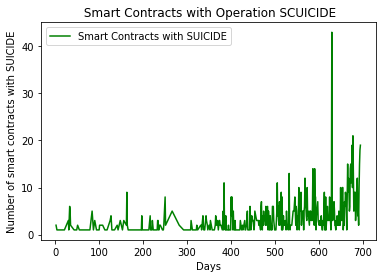

In [90]:
# Caculate how many smart contracts created with suicide per day
time2SUI = {}
for address in withDate_Dao:
    suicide = withDate_Dao[address][-1]
    timesui = withDate_Dao[address][0]
    if timesui != 0:
        if  suicide in time2SUI :
            time2SUI [suicide] += 1
        else:
            time2SUI [suicide] = 1
 # Plot how many smart contracts created with SSTORE per day
lists_sui = sorted(time2SUI.items())
x, y = zip(*lists_sui) # unpack a list of pairs into two tuples
plt.title(' Smart Contracts with Operation SCUICIDE')
plt.xlabel('Days')
plt.ylabel('Number of smart contracts with SUICIDE')
plt.plot(x, y,  color='Green', label='Smart Contracts with SUICIDE')
plt.legend()
plt.show()

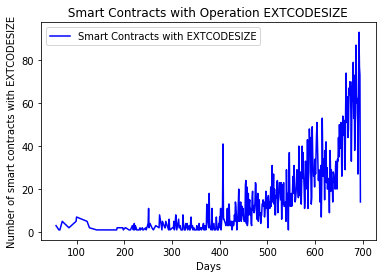

In [92]:
time2EX = {}
for address in withDate_Dao:
    extime = withDate_Dao[address][-1]
    timeex = withDate_Dao[address][1]
    if timeex != 0:
        if  extime in  time2EX :
            time2EX [extime] += 1
        else:
            time2EX [extime] = 1
 # Plot how many smart contracts created with SSTORE per day
lists_ex = sorted(time2EX.items())
x, y = zip(*lists_ex) # unpack a list of pairs into two tuples
plt.title(' Smart Contracts with Operation EXTCODESIZE ')
plt.xlabel('Days')
plt.ylabel('Number of smart contracts with EXTCODESIZE')
plt.plot(x, y,  color='blue', label='Smart Contracts with EXTCODESIZE')
plt.legend()
plt.show()

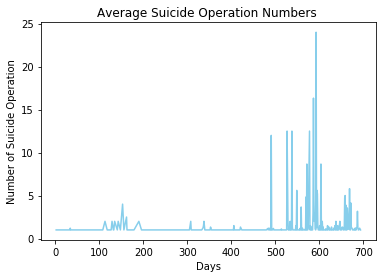

In [93]:
#Caculate sum of suicide
sum_Sui = {}
for address in withDate_Dao:
    time = withDate_Dao[address][-1]
    numStore = withDate_Dao[address][0]
    if time in sum_Sui:
        sum_Sui[time] += numStore
    else:
        sum_Sui[time] = numStore
#Caculate average of suicide
ave_Sui ={x:float(sum_Sui[x])/time2SUI[x] for x in time2SUI }
# Plot average suicide created per day
# Plot average SSTORE Operations
lists_aveSui= sorted(ave_Sui.items())
x, y = zip(*lists_aveSui) # unpack a list of pairs into two tuples
plt.title('Average Suicide Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of Suicide Operation')
plt.plot(x, y,  color='skyblue')
plt.show()


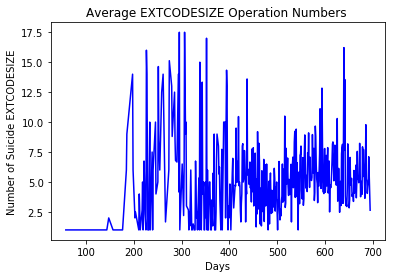

In [94]:
#Caculate sum of EXTCODESIZE
sum_EX = {}
for address in withDate_Dao:
    time = withDate_Dao[address][-1]
    numStore = withDate_Dao[address][1]
    if time in sum_EX:
        sum_EX[time] += numStore
    else:
        sum_EX[time] = numStore
#Caculate average of suicide
ave_EX ={x:float(sum_EX[x])/time2EX[x] for x in time2EX }
#plot how many EXTCODESIZE created perday
lists_aveEX= sorted(ave_EX.items())
x, y = zip(*lists_aveEX) # unpack a list of pairs into two tuples
plt.title('Average EXTCODESIZE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of Suicide EXTCODESIZE')
plt.plot(x, y,  color='blue')
plt.show()

In [102]:
sum_Sui

{0: 0,
 1: 0,
 2: 2,
 3: 0,
 4: 1,
 5: 0,
 6: 1,
 7: 1,
 8: 0,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 15: 1,
 16: 0,
 17: 0,
 18: 1,
 19: 0,
 20: 0,
 21: 1,
 22: 0,
 23: 0,
 25: 0,
 26: 0,
 27: 0,
 30: 3,
 31: 1,
 32: 0,
 33: 6,
 34: 6,
 35: 2,
 36: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 1,
 45: 1,
 49: 1,
 50: 0,
 51: 2,
 52: 0,
 53: 0,
 54: 0,
 55: 1,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 1,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 79: 1,
 83: 0,
 84: 5,
 85: 0,
 86: 0,
 87: 1,
 88: 0,
 90: 3,
 91: 0,
 92: 0,
 93: 0,
 94: 1,
 95: 0,
 97: 1,
 98: 0,
 99: 0,
 100: 1,
 101: 2,
 102: 0,
 103: 0,
 104: 2,
 105: 0,
 106: 0,
 107: 0,
 108: 2,
 110: 0,
 111: 0,
 112: 0,
 113: 2,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 1,
 119: 0,
 121: 0,
 122: 0,
 123: 0,
 125: 3,
 126: 0,
 127: 4,
 128: 0,
 129: 2,
 132: 1,
 133: 1,
 134: 0,
 135: 2,
 136: 0,
 137: 0,
 138: 0,
 139: 0,
 140: 0,
 141: 2,
 142:

In [103]:
#找出最大的EXTCODESIZE的key和value
max(sum_Sui.items(), key=lambda k: k[1])

(672, 62)

In [17]:
withDate_Dao

{'0x278a7b0a90f41a660765694c4c20af2bd09f45f1': [0, 0, 695],
 '0xefdbec62ad88e50c872b027489b47be1d906fdd6': [0, 0, 695],
 '0x80d0cb118f7179c08157c86f8ed416581278bb6a': [0, 0, 695],
 '0xd8e64769bb02136564737a4ecc712083b473db86': [0, 0, 695],
 '0xa3114b268ff4327525fbc0dd5c48e0b4304d07b9': [0, 0, 695],
 '0x6f2211b4ac81da3d3e3ffd523867155cc5fcfaca': [0, 0, 695],
 '0xb1dda9da790e6e8a644698d56f720709bae681e9': [0, 0, 695],
 '0xae5c3ab8ed2a79edd8790ea1b6cdef9992ffa452': [2, 0, 695],
 '0xde305be24cd8089d02ffdb82422d767907634f0f': [1, 0, 695],
 '0x00765eaabedbc0ec71e922178b5cf6f5632ec324': [0, 0, 695],
 '0x9d5fe0ebb989bec0249fab6d85cab0b931b42fb4': [1, 0, 695],
 '0xa42868496e6b98d655e4a820801d8df8f4abe2b3': [1, 0, 695],
 '0xd9e7d9a56ee6a4035ee8a9624c96eca1e4440671': [4, 0, 695],
 '0xfedae5642668f8636a11987ff386bfd215f942ee': [1, 0, 695],
 '0xea35ee1c5be37333fa5c254b67e4957bdc4ff844': [0, 0, 695],
 '0xb0c81081e1e0ad9a4382365e9cc8e1cb29989632': [1, 0, 695],
 '0xfec6896d1918232b70b1981d7f5503bc0b89

In [106]:
#找出这一天所有的smart contract 和他们的EXTCODESIZE
max672 = {}
for key in withDate_Dao:
          if withDate_Dao[key][-1] == 672:
            if withDate_Dao[key][0] != 0:
                max672[key] =  withDate_Dao[key][0]
max672

{'0x166b30dfab3090f06778c864db7ec09e22d8b01a': 24,
 '0x2075d158924f5030aece55179848c2bd7ec5833f': 1,
 '0x21594a9ce1c290915242e6aa9c8d29c34eb7f9eb': 1,
 '0x41642b325a44df26357aad70f013d828f5adc52a': 1,
 '0x440713f4d21d54a2a5fd6f8d358df40c32a04fbd': 1,
 '0x613011F70721573965515dC19360bff13C2cD5C3': 1,
 '0x8c7d36631768c83feae33ec42a843cc2a2fa1897': 1,
 '0x8d8194537110a4659d4bf0b8df030b0ced50b39e': 2,
 '0xACbfB851D69EF8Eca1453d82f38B590268ca46B1': 1,
 '0xb6d85349ec816726bf07e1690d56d712acabe409': 1,
 '0xbaca9c2faf03898fc5197ee90efb6e13df7f1d55': 1,
 '0xc512db2a8774d7923bfd625aa590dd15c5ebf017': 1,
 '0xcc3c51568f7897ec3682b3985f209a6e466d1bc4': 1,
 '0xd7522fb7431a7e9a408954fee58c2ba2078da6db': 24,
 '0xfea795702ac6c7e117d9148aff4dcc12f19e7d42': 1}

In [21]:
# How many SSORE is in front of SLOAD
number_S_L = {}
for filename in os.listdir('/Users/Gabriel/Desktop/opcode'):
    with open('/Users/Gabriel/Desktop/opcode/' + filename) as f:
        content = f.readlines()
        content = [x.strip() for x in content]
        if 'SSTORE' in content and 'SLOAD' in content:
            p = content.index('SSTORE')
            q = content.index('SLOAD')
            if p >0 and q >0:
                if p>q:
                    number_S_L[filename] = [p,q,1]
                elif p<q:
                    number_S_L[filename] = [p,q,0]
    
            

In [22]:
# SSTORE in front of SLOAD
S_up_L = sum([1 for x in number_S_L.values() if x[2]!=0])
# SLOAD in front of SSTORE
L_up_S = sum([1 for x in number_S_L.values() if x[2]==0])

In [23]:
S_up_L

14768

In [24]:
L_up_S

1024

In [25]:
# Contract name (SLOAD above SSTORE)
for x in number_S_L:
    if number_S_L[x][-1]==0:
        print(x)

0xf3c700fd2b484fea0dc752785e7031db68f59e64
0xea5f88e54d982cbb0c441cde4e79bc305e5b43bc
0x339993e781b7a27061fa99373821fc507f919a1d
0xc0661b1fce0e77ea21a3268c5d42a5442dd96817
0x9dfe4643C04078a46803edCC30a3291b76d4c20c
0x038cabdd362c5a5192f968caedfa8ce8777b312d
0x66b5961883c0b1966f4a0d878c1f8841155e839c
0x984e5e8cf4bbfe8f6c5a1398fbbfa499a5d0e6c8
0x74c1e4b8cae59269ec1d85d3d4f324396048f4ac
0xf11fa3381e5525780228c77d7fabfa9ca921d302
0x9A7069c319E0052e071fcB437c8AA3343555dadC
0xb0a0a070640b450eb136dc377208469ee4f49fbc
0xf50400935bec25cf89031146b8604371197f2cae
0x2001f2a0cf801ecfda622f6c28fb6e10d803d969
0x503f4ed8299fa58c8b5baafc2ae8868e06da6106
0x7120ff5f847df1db65bb5dd2aa503dc703057747
0x038Da599A137f89f49b43cd0d561d5E159058b60
0x523a4d2e260ee6230b4a99f1c74833e0aca94178
0x9402cedd72e6e586e092caa2760887e24a8a3b5b
0x75aa7b0d02532f3833b66c7f0ad35376d373ddf8
0x7dccb8c9639b50cfc33175307f0656d6eb5892ac
0xdcf8590df499eb04ee48c18676c07e2afa20d53d
0xfae8382b74479261c6a75cebf32e39c4dd249ea8
0xb705ac4a3

In [26]:
# Total Smart Contracts Collected
len(Name2Stat)

16603

In [27]:
#Caculate specific number of each expensive/gas cost pattern for each smart contract
stat_S = sum([1 for x in Name2Stat.values() if x[0]!=0])
stat_L = sum([1 for x in Name2Stat.values() if x[1]!=0])
stat_B = sum([1 for x in Name2Stat.values() if x[2]!=0])
stat_SL = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[1]!=0)])
stat_OS = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[1]==0 and x[2]==0)])
stat_OSL = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[1]!=0 and x[2]==0)])
stat_OSWB =sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[1]==0)])
stat_OLWB = sum([1 for x in Name2Stat.values() if (x[0]==0 and x[1]!=0)])
stat_OL = sum([1 for x in Name2Stat.values() if (x[0]==0 and x[1]!=0 and x[2]==0)])
stat_OB = sum([1 for x in Name2Stat.values() if (x[0]==0 and x[1]==0 and x[2]!=0)])
stat_NSLB = sum([1 for x in Name2Stat.values() if (x[0]==0 and x[1]==0 and x[2]==0)])
stat_SB = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[2]!=0)])
stat_LB = sum([1 for x in Name2Stat.values() if (x[1]!=0 and x[2]!=0)])
stat_SLB = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[1]!=0 and x[2]!=0)])

In [28]:
# Put all these pattern in a List "num_list".
num_list = [stat_S,stat_L,stat_B,stat_SL,stat_SB,stat_LB,stat_SLB]
print(num_list)
num_list2 = [stat_OS,stat_OL,stat_OB,stat_OSL,stat_OSWB,stat_OLWB,stat_NSLB]
print(num_list2)

[15795, 16286, 3698, 15792, 3538, 3648, 3536]
[1, 382, 48, 12256, 3, 494, 266]


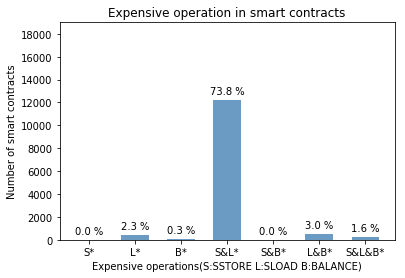

In [29]:
# Plot all expensive operations in smart contracts for this
plt.title('Expensive operation in smart contracts')
plt.xlabel('Expensive operations(S:SSTORE L:SLOAD B:BALANCE)')
plt.ylabel('Number of smart contracts')
plt.xticks(range(7),['S*','L*','B*','S&L*','S&B*','L&B*','S&L&B*'])
plt.ylim([0,19000])
plt.yticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
for x,y in enumerate(num_list2):
    plt.text(x,y-500,'%0.1f %%\n' %(y/count_sc*100),ha='center')
plt.bar(range(7),num_list2 , align = 'center',color='steelblue', width = 0.6, alpha = 0.8) 
plt.show()  

In [30]:
# Dictionay dict conclude all expensive pattern and assign it to a number_dict
dict = {'S':stat_S/count_sc, 'L': stat_L/count_sc, 'B': stat_B/count_sc,'S&L': stat_SL/count_sc, 'S&B': stat_SB/count_sc,'L&B': stat_LB/count_sc,'S&L&B': stat_SLB/count_sc}
number_dict = dict
number_dict

{'B': 0.22273083177738962,
 'L': 0.9809070649882551,
 'L&B': 0.21971932783231946,
 'S': 0.9513340962476661,
 'S&B': 0.2130940191531651,
 'S&L': 0.9511534060109619,
 'S&L&B': 0.21297355899536227}

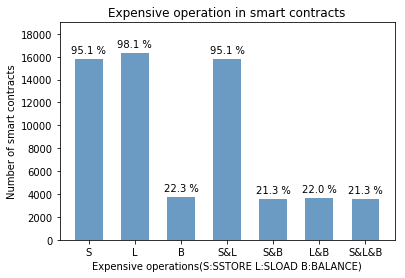

In [31]:
# Plot all expensive operations in smart contracts
plt.title('Expensive operation in smart contracts')
plt.xlabel('Expensive operations(S:SSTORE L:SLOAD B:BALANCE)')
plt.ylabel('Number of smart contracts')
plt.xticks(range(7),['S','L','B','S&L','S&B','L&B','S&L&B'])
plt.ylim([0,19000])
plt.yticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
for x,y in enumerate(num_list):
    plt.text(x,y-500,'%0.1f %%\n' %(y/count_sc*100),ha='center')
plt.bar(range(7),num_list , align = 'center',color='steelblue', width = 0.6, alpha = 0.8) 
plt.show()  

In [32]:
#Caculate only SSTORE:
for x in Name2Stat:
    if Name2Stat[x][0]!=0 and Name2Stat[x][1]==0 and Name2Stat[x][2]==0:
        print(x)

0x9295ede03f6eab5c8f215d3ddcf7dca3a26ca087


In [33]:
#Caculate only SSTORE with(BALANCE)
for y in Name2Stat:
    if Name2Stat[y][0]!=0 and Name2Stat[y][1]==0:
        print(y)

0xb1c384fab269ac9ad3caacddbc4a211a631947b9
0xbf915382f51fc659d0a506f7037382edc49667e7
0x9295ede03f6eab5c8f215d3ddcf7dca3a26ca087


In [34]:
for z in Name2Stat:
    if Name2Stat[z][0] == 0 and Name2Stat[z][1] == 0 and Name2Stat[z][2] == 0:
        print(z)
    

0x747fb90f7f5d7dfde8421764b203bbb8f1fca074
0x56ef98199fb28abdccd3b408885ce7168c9fa9fe
0x87d753f3d61bc1f3f525e835e0d6904a5a4a7e16
0x081286304202e8967d3de0bdaf1d77d7d0a291ea
0x0f03784a198721737369e7f0D5312161BCD9F2eF
0x51e6263bef3970485b1545d4ca181749d9b19875
0x3039d0a94d51c67a4f35e742b571874e53467804
0x19259eddc53136c1045b557d8e8a8cff64121550
0x4601c5442f97b9c14f335720b935d59642f1ffaf
0xa7136d7c9439dbda7f20e7c3f9173efae79b8429
0x8f811657b12f378fedd85af591be8bf8c22dd333
0x86A54B7E55b1A301306e4Fe1667bbc9C2839465B
0x952c9a569725d4cb710c69184e5eb8f56d6b8bd6
0x929B51fa99127c2c242001843087605B2cc313aE
0xb5312886c3bacf5c8f94a096d1c731e520934c8c
0x1013D5F34d934b052768799efa18cf1aC7423778
0x1e9d5e4ed8ef31cfece10b4c92c9057f991f36bc
0x65c440683088134aef7af22f3fad6a9ee5c19fed
0xf603c4161c388b77249486f9cb6f1741abda6a9b
0xa918185d042016e2d87c5cb0c7d216b062f79559
0xdc1bCC1D3B7A5D4d2eab60CF242F58B331d5812B
0x0Aacb3F58b66393EC5Fe90F9ad4483A992A8B7F3
0x31710812a91c9cc695750a8d47fad1bb1d3a8f7d
0xf20d09c63

In [35]:
#Import date of all smart contracts
with open('/Users/Gabriel/Desktop/contract_info_1.csv', mode='r') as infile:
    reader = csv.reader(infile)
    date_dict = {rows[0]:rows[4] for rows in reader}

In [36]:
#Combine Num2Stat(Opcode) and date_dict(with date) in a new Dictionary withDate_dict.
withDate_dict = {}
for adr in date_dict:
    if adr == 'Address':continue
    if adr not in Name2Stat:continue
    withDate_dict[adr] = Name2Stat[adr]+ [date_dict[adr]] 

In [37]:
withDate_dict

{'0x278a7b0a90f41a660765694c4c20af2bd09f45f1': [7, 24, 0, '3/1/2018'],
 '0xefdbec62ad88e50c872b027489b47be1d906fdd6': [7, 24, 0, '3/1/2018'],
 '0x80d0cb118f7179c08157c86f8ed416581278bb6a': [11, 33, 0, '3/1/2018'],
 '0xd8e64769bb02136564737a4ecc712083b473db86': [9, 14, 0, '3/1/2018'],
 '0xa3114b268ff4327525fbc0dd5c48e0b4304d07b9': [10, 37, 0, '3/1/2018'],
 '0x6f2211b4ac81da3d3e3ffd523867155cc5fcfaca': [7, 24, 0, '3/1/2018'],
 '0xb1dda9da790e6e8a644698d56f720709bae681e9': [17, 39, 2, '3/1/2018'],
 '0xae5c3ab8ed2a79edd8790ea1b6cdef9992ffa452': [10, 31, 0, '3/1/2018'],
 '0xde305be24cd8089d02ffdb82422d767907634f0f': [15, 44, 1, '3/1/2018'],
 '0x00765eaabedbc0ec71e922178b5cf6f5632ec324': [6, 18, 0, '3/1/2018'],
 '0x9d5fe0ebb989bec0249fab6d85cab0b931b42fb4': [9, 31, 0, '3/1/2018'],
 '0xa42868496e6b98d655e4a820801d8df8f4abe2b3': [9, 39, 0, '3/1/2018'],
 '0xd9e7d9a56ee6a4035ee8a9624c96eca1e4440671': [5, 37, 2, '3/1/2018'],
 '0xfedae5642668f8636a11987ff386bfd215f942ee': [13, 33, 0, '3/1/2018'],


In [38]:
#找出BALANCE最大的那一天 
withDate_dict['0x7371b37a352903bc62cf8a26e8509fd5a3bab98d'][-1]

'1/21/2018'

In [39]:
#找出EXTCODESIZE最大的那一天
withDate_dict['0x166b30dfab3090f06778c864db7ec09e22d8b01a'][-1]

'2/6/2018'

In [42]:
for date in withDate_dict:
    min_date = datetime.strptime('4/05/2016', '%m/%d/%Y')
    date_new = datetime.strptime(withDate_dict[date][-1], '%m/%d/%Y')
    days = (date_new - min_date).days
    withDate_dict[date][-1] = days


In [43]:
withDate_dict

{'0x278a7b0a90f41a660765694c4c20af2bd09f45f1': [7, 24, 0, 695],
 '0xefdbec62ad88e50c872b027489b47be1d906fdd6': [7, 24, 0, 695],
 '0x80d0cb118f7179c08157c86f8ed416581278bb6a': [11, 33, 0, 695],
 '0xd8e64769bb02136564737a4ecc712083b473db86': [9, 14, 0, 695],
 '0xa3114b268ff4327525fbc0dd5c48e0b4304d07b9': [10, 37, 0, 695],
 '0x6f2211b4ac81da3d3e3ffd523867155cc5fcfaca': [7, 24, 0, 695],
 '0xb1dda9da790e6e8a644698d56f720709bae681e9': [17, 39, 2, 695],
 '0xae5c3ab8ed2a79edd8790ea1b6cdef9992ffa452': [10, 31, 0, 695],
 '0xde305be24cd8089d02ffdb82422d767907634f0f': [15, 44, 1, 695],
 '0x00765eaabedbc0ec71e922178b5cf6f5632ec324': [6, 18, 0, 695],
 '0x9d5fe0ebb989bec0249fab6d85cab0b931b42fb4': [9, 31, 0, 695],
 '0xa42868496e6b98d655e4a820801d8df8f4abe2b3': [9, 39, 0, 695],
 '0xd9e7d9a56ee6a4035ee8a9624c96eca1e4440671': [5, 37, 2, 695],
 '0xfedae5642668f8636a11987ff386bfd215f942ee': [13, 33, 0, 695],
 '0xea35ee1c5be37333fa5c254b67e4957bdc4ff844': [13, 43, 0, 695],
 '0xb0c81081e1e0ad9a4382365e9cc8e

In [44]:
maxBA = {}
for key in withDate_dict:
          if withDate_dict[key][-1] == 656:
            if withDate_dict[key][2] != 0:
                maxBA[key] =  withDate_dict[key][2]

In [45]:
maxBA

{'0x06Cd2eEF7497911037ed631CAe1ecb307B4D4de1': 1,
 '0x0e752b742f744fdc2d93774da44c37b72c3e6952': 1,
 '0x2fabe69843e9a74a35b89145cb52e5568986c7a1': 171,
 '0x4ba72f0f8dad13709ee28a992869e79d0fe47030': 1,
 '0x99287f6a84d56fc3bb2ad95a4bbe783403f825f0': 3,
 '0xa3c230e94d733b2f96503c9452c95cf9e74910e0': 5,
 '0xb67b88a25708a35ae7c2d736d398d268ce4f7f83': 2,
 '0xe171783da2c451186b4256727481fa30203fef86': 1}

In [46]:
for filename in os.listdir('/Users/Gabriel/Desktop/opcode'):
    with open('/Users/Gabriel/Desktop/opcode/0x2fabe69843e9a74a35b89145cb52e5568986c7a1' ) as f:
        content = f.readlines()
        content = [x.strip() for x in content]

In [47]:
#Caculate specific number of each expensive/gas cost pattern for each smart contract
statW_S = sum([1 for x in withDate_dict.values() if x[0]!=0])
statW_L = sum([1 for x in withDate_dict.values() if x[1]!=0])
statW_B = sum([1 for x in withDate_dict.values() if x[2]!=0])
statW_SL = sum([1 for x in withDate_dict.values() if (x[0]!=0 and x[1]!=0)])
statW_SB = sum([1 for x in withDate_dict.values() if (x[0]!=0 and x[2]!=0)])
statW_LB = sum([1 for x in withDate_dict.values() if (x[1]!=0 and x[2]!=0)])
statW_SLB = sum([1 for x in withDate_dict.values() if (x[0]!=0 and x[1]!=0 and x[2]!=0)])

In [48]:
numW_list= [statW_S,statW_L,statW_B,statW_SL,statW_SB,statW_LB,statW_SLB]
numW_list

[15795, 16286, 3698, 15792, 3538, 3648, 3536]

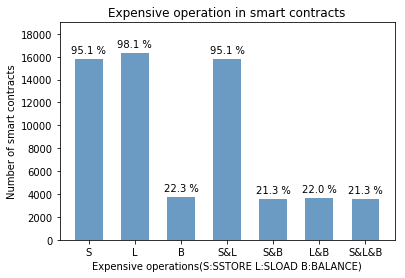

In [49]:
# Plot all expensive operations in smart contracts with withDate_dict
plt.title('Expensive operation in smart contracts')
plt.xlabel('Expensive operations(S:SSTORE L:SLOAD B:BALANCE)')
plt.ylabel('Number of smart contracts')
plt.xticks(range(7),['S','L','B','S&L','S&B','L&B','S&L&B'])
plt.ylim([0,19000])
plt.yticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
for x,y in enumerate(numW_list):
    plt.text(x,y-500,'%0.1f %%\n' %(y/count_sc*100),ha='center')
plt.bar(range(7),num_list , align = 'center',color='steelblue', width = 0.6, alpha = 0.8) 
plt.show()  

In [50]:
#Caculate how many smart contracts created per day
time2SCSD = {}
for address in withDate_dict:
    time = withDate_dict[address][-1]
    if time in time2SCSD:
        time2SCSD[time] += 1
    else:
        time2SCSD[time] = 1

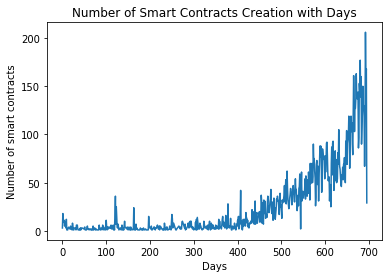

In [51]:
# Plot smart contracts created per day
lists = sorted(time2SCSD.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.title('Number of Smart Contracts Creation with Days')
plt.xlabel('Days')
plt.ylabel('Number of smart contracts')
plt.plot(x, y)
plt.show()

In [52]:
# Caculate how many smart contracts created with SSTORE per day
time2SST = {}
for address in withDate_dict:
    st_time = withDate_dict[address][-1]
    timeSST = withDate_dict[address][0]
    if timeSST != 0:
        if st_time in time2SST :
            time2SST [st_time] += 1
        else:
            time2SST [st_time] = 1

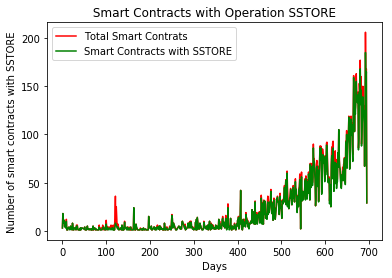

In [53]:
# Plot how many smart contracts created with SSTORE per day
lists_SST = sorted(time2SST.items())
x, y = zip(*lists_SST) # unpack a list of pairs into two tuples
plt.title(' Smart Contracts with Operation SSTORE ')
plt.xlabel('Days')
plt.ylabel('Number of smart contracts with SSTORE')
x1, y1 = zip(*lists)
plt.plot(x1, y1, color='red', label='Total Smart Contrats')
plt.plot(x, y,  color='Green', label='Smart Contracts with SSTORE')
plt.legend()
plt.show()

In [54]:
# Caculate how many smart contracts created with SLOAD per day
time2SSL = {}
for address in withDate_dict:
    sl_time = withDate_dict[address][-1]
    timeSL = withDate_dict[address][1]
    if timeSL != 0:
        if sl_time in time2SSL:
            time2SSL[sl_time] += 1
        else:
            time2SSL[sl_time] = 1

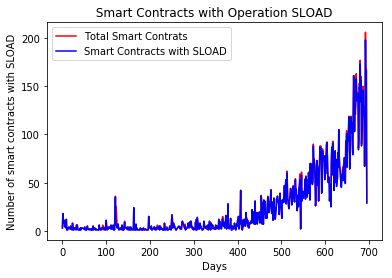

In [55]:
# Plot how many smart contracts created with SLOAD per day
lists_SSL = sorted(time2SSL.items())
x, y = zip(*lists_SSL) # unpack a list of pairs into two tuples
plt.title(' Smart Contracts with Operation SLOAD ')
plt.xlabel('Days')
plt.ylabel('Number of smart contracts with SLOAD')
x1, y1 = zip(*lists)
plt.plot(x1, y1, color='red', label='Total Smart Contrats')
plt.plot(x, y,  color='blue', label='Smart Contracts with SLOAD')
plt.legend()
plt.show()

In [56]:
# Caculate how many smart contracts created with BALANCE per day
time2BA = {}
for address in withDate_dict:
    b_time = withDate_dict[address][-1]
    timeBA = withDate_dict[address][2]
    if timeBA != 0:
        if b_time in time2BA:
            time2BA[b_time] += 1
        else:
            time2BA[b_time] = 1

In [57]:
time2BA

{0: 1,
 1: 13,
 2: 1,
 3: 1,
 4: 3,
 5: 2,
 6: 5,
 7: 2,
 9: 11,
 15: 1,
 16: 2,
 18: 2,
 19: 2,
 21: 1,
 22: 1,
 23: 5,
 26: 1,
 27: 1,
 30: 2,
 32: 3,
 33: 6,
 34: 4,
 35: 1,
 38: 1,
 41: 3,
 42: 1,
 43: 1,
 45: 2,
 49: 1,
 51: 2,
 53: 1,
 57: 4,
 59: 1,
 61: 1,
 62: 1,
 63: 2,
 64: 1,
 67: 1,
 68: 1,
 70: 5,
 72: 2,
 73: 2,
 74: 2,
 77: 2,
 79: 1,
 83: 1,
 84: 2,
 86: 2,
 87: 1,
 90: 1,
 92: 1,
 94: 1,
 99: 5,
 100: 10,
 101: 2,
 103: 4,
 104: 2,
 105: 2,
 108: 2,
 110: 2,
 113: 1,
 121: 26,
 122: 5,
 123: 25,
 125: 1,
 126: 3,
 127: 5,
 128: 3,
 129: 1,
 135: 2,
 136: 2,
 137: 1,
 138: 1,
 139: 3,
 140: 1,
 142: 2,
 143: 3,
 147: 1,
 148: 2,
 150: 1,
 153: 2,
 155: 1,
 156: 2,
 162: 2,
 164: 4,
 166: 1,
 168: 1,
 169: 1,
 170: 1,
 178: 1,
 179: 1,
 180: 1,
 182: 1,
 184: 1,
 185: 2,
 190: 1,
 197: 5,
 198: 1,
 203: 4,
 205: 1,
 206: 1,
 207: 1,
 209: 1,
 217: 1,
 218: 2,
 219: 1,
 220: 1,
 221: 5,
 225: 1,
 233: 1,
 234: 3,
 235: 1,
 236: 1,
 237: 2,
 239: 1,
 241: 1,
 245: 1,
 246

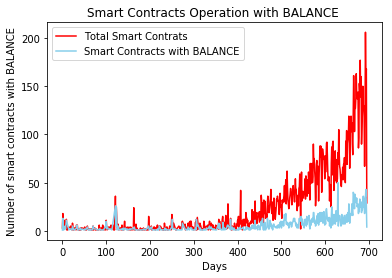

In [58]:
# Plot how many smart contracts created with SSTORE per day
lists_BA = sorted(time2BA.items())
x, y = zip(*lists_BA) # unpack a list of pairs into two tuples
x1, y1 = zip(*lists)
plt.title('Smart Contracts Operation with BALANCE ')
plt.xlabel('Days')
plt.ylabel('Number of smart contracts with BALANCE')
plt.plot(x1, y1, color='red', label='Total Smart Contrats')
plt.plot(x, y,  color='skyblue', label='Smart Contracts with BALANCE')
plt.legend()
plt.show()

In [59]:
# Caculate how many SSTORE operations per day
sum_SST = {}
for address in withDate_dict:
    time = withDate_dict[address][-1]
    numStore = withDate_dict[address][0]
    if time in sum_SST:
        sum_SST[time] += numStore
    else:
        sum_SST[time] = numStore


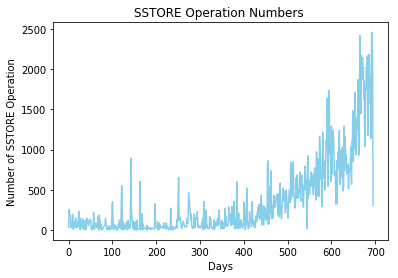

In [60]:
# Plot how many SSTORE operations per day
lists_sumST = sorted(sum_SST.items())
x, y = zip(*lists_sumST) # unpack a list of pairs into two tuples
plt.title('SSTORE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of SSTORE Operation')
plt.plot(x, y,  color='skyblue')
plt.show()

In [61]:
# Caculate how many SLOAD operations per day
sum_SL = {}
for address in withDate_dict:
    time = withDate_dict[address][-1]
    numSload = withDate_dict[address][1]
    if time in sum_SL:
        sum_SL[time] += numSload
    else:
        sum_SL[time] = numSload

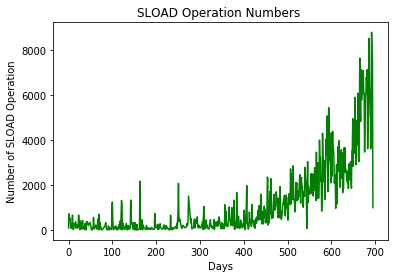

In [62]:
# Plot how many SLOAD operations per day
lists_sumSL = sorted(sum_SL.items())
x, y = zip(*lists_sumSL) # unpack a list of pairs into two tuples
plt.title('SLOAD Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of SLOAD Operation')
plt.plot(x, y,  color='green')
plt.show()

In [63]:
# Caculate how many BALANCE operations per day
sum_BA = {}
for address in withDate_dict:
    time = withDate_dict[address][-1]
    numBA = withDate_dict[address][2]
    if time in sum_BA:
        sum_BA[time] += numBA
    else:
        sum_BA[time] = numBA

In [64]:
sum_BA

{0: 1,
 1: 17,
 2: 2,
 3: 1,
 4: 3,
 5: 4,
 6: 10,
 7: 2,
 8: 0,
 9: 34,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 15: 2,
 16: 4,
 17: 0,
 18: 5,
 19: 2,
 20: 0,
 21: 4,
 22: 1,
 23: 9,
 25: 0,
 26: 1,
 27: 4,
 30: 8,
 31: 0,
 32: 3,
 33: 6,
 34: 4,
 35: 1,
 36: 0,
 38: 1,
 39: 0,
 40: 0,
 41: 3,
 42: 1,
 43: 1,
 45: 8,
 49: 8,
 50: 0,
 51: 3,
 52: 0,
 53: 3,
 54: 0,
 55: 0,
 56: 0,
 57: 8,
 58: 0,
 59: 2,
 61: 1,
 62: 1,
 63: 2,
 64: 3,
 65: 0,
 66: 0,
 67: 1,
 68: 1,
 69: 0,
 70: 25,
 71: 0,
 72: 2,
 73: 5,
 74: 3,
 75: 0,
 76: 0,
 77: 3,
 79: 2,
 83: 1,
 84: 14,
 85: 0,
 86: 2,
 87: 1,
 88: 0,
 90: 1,
 91: 0,
 92: 4,
 93: 0,
 94: 1,
 95: 0,
 97: 0,
 98: 0,
 99: 25,
 100: 41,
 101: 2,
 102: 0,
 103: 6,
 104: 3,
 105: 3,
 106: 0,
 107: 0,
 108: 2,
 110: 4,
 111: 0,
 112: 0,
 113: 1,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 121: 26,
 122: 21,
 123: 25,
 125: 1,
 126: 4,
 127: 12,
 128: 5,
 129: 1,
 132: 0,
 133: 0,
 134: 0,
 135: 2,
 136: 2,
 137: 1,
 138: 1,
 139: 5,
 140: 1,
 14

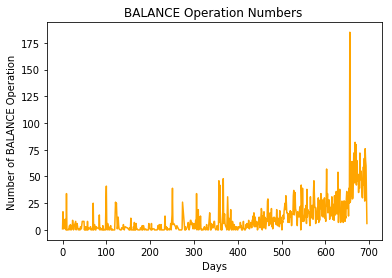

In [65]:
# Plot how many BALANCE operations per day
lists_sumBA = sorted(sum_BA.items())
x, y = zip(*lists_sumBA) # unpack a list of pairs into two tuples
plt.title('BALANCE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of BALANCE Operation')
plt.plot(x, y,  color='orange')
plt.show()

In [66]:
# Caculate Average operations used perday
# Average SSTORE Operations
ave_SST ={x:float(sum_SST[x])/time2SST[x] for x in time2SST  }

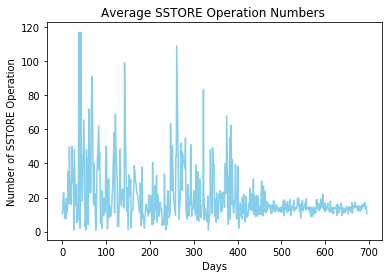

In [67]:
# Plot average SSTORE Operations
lists_aveSST= sorted(ave_SST.items())
x, y = zip(*lists_aveSST) # unpack a list of pairs into two tuples
plt.title('Average SSTORE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of SSTORE Operation')
plt.plot(x, y,  color='skyblue')
plt.show()

In [68]:
# Average SLOAD Operations
ave_SL ={x:float(sum_SL[x])/time2SSL[x] for x in time2SSL  }

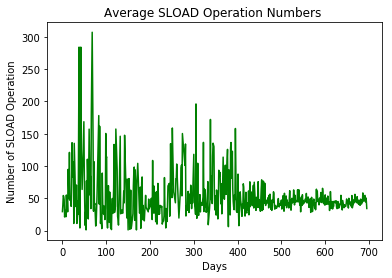

In [69]:
# Plot average SLOAD Operations
lists_aveSL= sorted(ave_SL.items())
x, y = zip(*lists_aveSL) # unpack a list of pairs into two tuples
plt.title('Average SLOAD Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of SLOAD Operation')
plt.plot(x, y,  color='green')
plt.show()

In [70]:
# Average BALANCE Operations
ave_BA ={x:float(sum_BA[x])/time2BA[x] for x in time2BA  }
max(ave_BA, key=ave_BA.get)

656

In [71]:
# Caculate how many Balance operations in that day sum_BA in 656 is 185
# time2BA is 8 

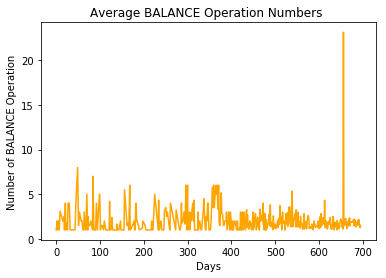

In [72]:
# Plot average SLOAD Operations
lists_aveBA= sorted(ave_BA.items())
x, y = zip(*lists_aveBA) # unpack a list of pairs into two tuples
plt.title('Average BALANCE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('Number of BALANCE Operation')
plt.plot(x, y,  color='orange')
plt.show()

In [73]:
# Caculate Percentage operations used perday
# Percentage SSTORE
percent_SST ={x:float(time2SST[x]/time2SCSD[x])*100 for x in time2SST}

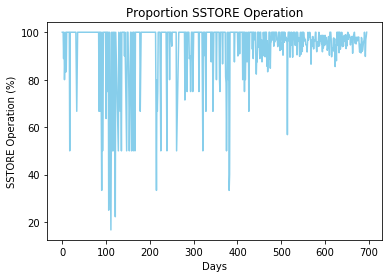

In [74]:
# Plot average SLOAD Operations
lists_perBA= sorted(percent_SST.items())
x, y = zip(*lists_perBA) # unpack a list of pairs into two tuples
plt.title('Proportion SSTORE Operation')
plt.xlabel('Days')
plt.ylabel('SSTORE Operation (%)')
plt.plot(x, y,  color='skyblue')
plt.show()

In [75]:
# Caculate Percentage operations used perday
# Percentage SLOAD
percent_SSL ={x:float(time2SSL[x]/time2SCSD[x])*100 for x in time2SSL}

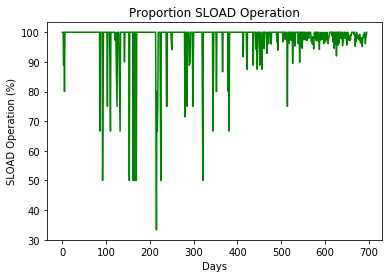

In [76]:
# Plot average SLOAD Operations
lists_perSL= sorted(percent_SSL.items())
x, y = zip(*lists_perSL) # unpack a list of pairs into two tuples
plt.title('Proportion SLOAD Operation')
plt.xlabel('Days')
plt.ylabel('SLOAD Operation (%)')
plt.plot(x, y,  color='green')
plt.show()

In [77]:
# Caculate Percentage operations used perday
# Percentage SLOAD
percent_BA ={x:float(time2BA[x]/time2SCSD[x])*100 for x in time2BA}

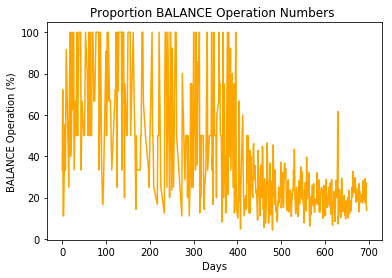

In [78]:
# Plot average SLOAD Operations
lists_perBA= sorted(percent_BA.items())
x, y = zip(*lists_perBA) # unpack a list of pairs into two tuples
plt.title('Proportion BALANCE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('BALANCE Operation (%)')
plt.plot(x, y,  color='orange')
plt.show()

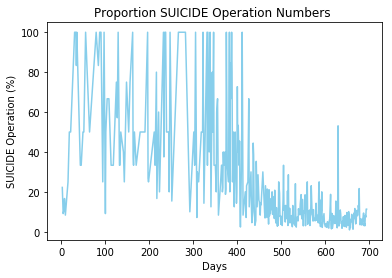

In [99]:
#Proportion of SUICIDE
# Caculate Percentage operations used perday
# Percentage SLOAD
percent_sui ={x:float(time2SUI[x]/time2SCSD[x])*100 for x in time2SUI}
lists_per_sui= sorted(percent_sui.items())
x, y = zip(*lists_per_sui) # unpack a list of pairs into two tuples
plt.title('Proportion SUICIDE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('SUICIDE Operation (%)')
plt.plot(x, y,  color='skyblue')
plt.show()

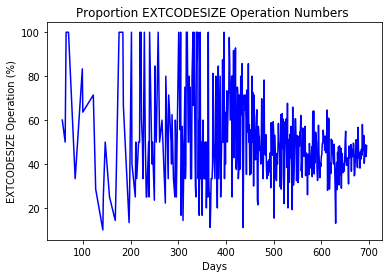

In [100]:
#Proportion of EXTCODESIZE
# Caculate Percentage operations used perday
# Percentage SLOAD
percent_EX ={x:float(time2EX[x]/time2SCSD[x])*100 for x in time2EX}
lists_per_EX= sorted(percent_EX.items())
x, y = zip(*lists_per_EX) # unpack a list of pairs into two tuples
plt.title('Proportion EXTCODESIZE Operation Numbers ')
plt.xlabel('Days')
plt.ylabel('EXTCODESIZE Operation (%)')
plt.plot(x, y,  color='blue')
plt.show()